### You will follow the instructions and concepts you saw in class today to:

retrieve the data
sample customer reviews using textblob
use a function to apply sentiment analysis to the whole data set
visualise the sentiment by department / division (optional- Stretch)
visualise to validate the sentiment analysis
apply another sentiment analyser
identify and evaluate the differences between each approach.

#### Starter steps
1. retrieve the data from this kaggle link
2. install texblob onto your conda environment
3. launch jupyter notebook in the same environment, and import pandas, matplotlib/seaborn and textblob
4. read the data into a dataframe with pandas
5. filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png)
6. use df.columns.str.lower() (or other preferred method) to standardise your column headers
7. EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

8. use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)

9. this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)

10. OPTIONAL - if you find it difficult to do this group by and visualise task in python- you can connect to the csv with Tableau and do the same chart there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_rating_tableau.png)

11. do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

12. for the any selected customer review, use textblob to break out the text into sentences (image clothing_sentences.png)

13. using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

14. define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

15. using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

16. visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)

17. using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

18. visualise this summary as a simple sorted bar chart

19. ##### OPTIONAL - if you find it difficult to do these group by and visualise tasks in python- you can output your data frame to a csv, then connect to that csv with Tableau and do the same charts there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_polarity_tableau.png)

20. tidy up your notebook as much as possible, removing any redundant code, and adding annotations where useful


# word doc into text 
step 1 install docx2txt 
step 2 import docx2txt

# nltk - once installed import and download 
step 1 install
step 2 import nltk 
step 3 nltk.download() - 

In [31]:
import docx2txt

In [107]:
import matplotlib.pyplot as plt

In [33]:
import pandas as pd
import matplotlib
import seaborn as sns

In [35]:
from textblob import TextBlob

In [28]:
import nltk 

In [19]:
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [74]:
df = pd.read_csv (r'Womens Clothing E-Commerce Reviews.csv')
df.head ()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [75]:
#check also the inplace option
df = df.drop(['Unnamed: 0','Clothing ID','Age','Recommended IND','Positive Feedback Count','Class Name'], axis=1)

In [59]:
dfselected = df[['Title', 'Review Text','Rating','Division Name','Department Name']]

In [79]:
df.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


6. use df.columns.str.lower() (or other preferred method) to standardise your column headers

In [77]:
df.columns = [colname.lower() for colname in list(df.columns)]

In [78]:
df.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


7. EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [81]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [87]:
df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

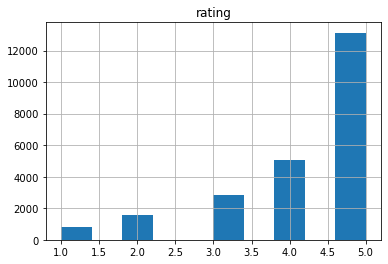

In [86]:
df.hist()

<AxesSubplot:>

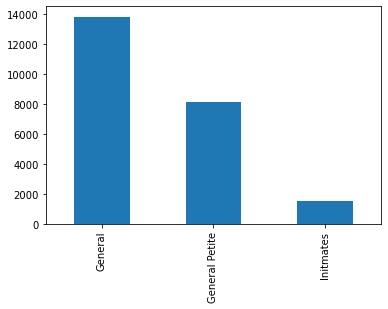

In [89]:
df['division name'].value_counts().plot(kind='bar')

<AxesSubplot:>

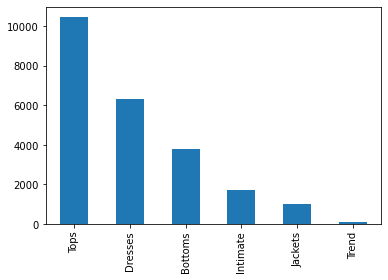

In [90]:
df['department name'].value_counts().plot(kind='bar')

In [91]:
df['review text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review text, Length: 23486, dtype: object

In [92]:
def get_len(x):
    # if x is not NaN, then:
    if x==x:
        return len(x)
    # else if x is NaN return 0
    else:
        return 0

In [99]:
df['len rev'] = df['review text'].apply(lambda x: get_len(x))

<AxesSubplot:xlabel='len rev', ylabel='Count'>

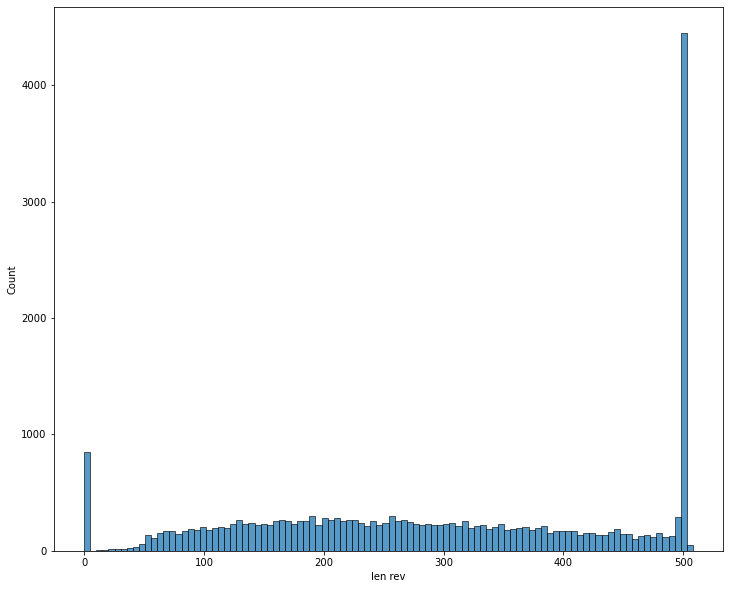

In [108]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df['len rev'], bins=100, ax=ax)

In [102]:
df[df['len rev'] == 500]['review text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

<AxesSubplot:xlabel='len rev', ylabel='Count'>

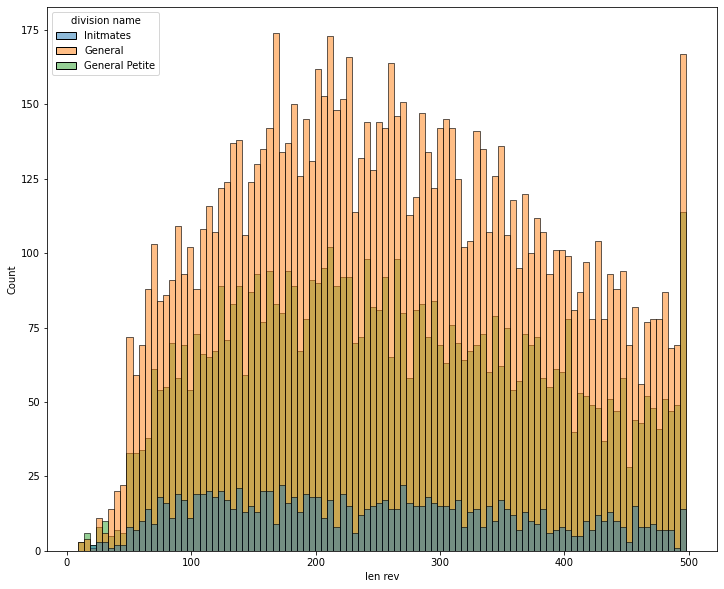

In [110]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df[(df['len rev'] < 499) & (df['len rev'] != 0)],
             x='len rev',
             bins=100,
             ax=ax,
             hue='division name')

<AxesSubplot:xlabel='len rev', ylabel='Count'>

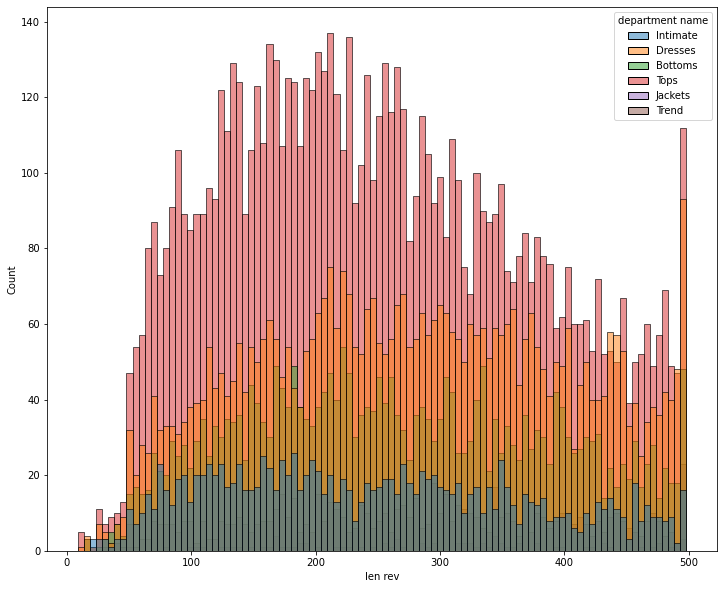

In [111]:
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(df[(df['len rev'] < 499) & (df['len rev'] != 0)],
             x='len rev',
             bins=100,
             ax=ax,
             hue='department name')

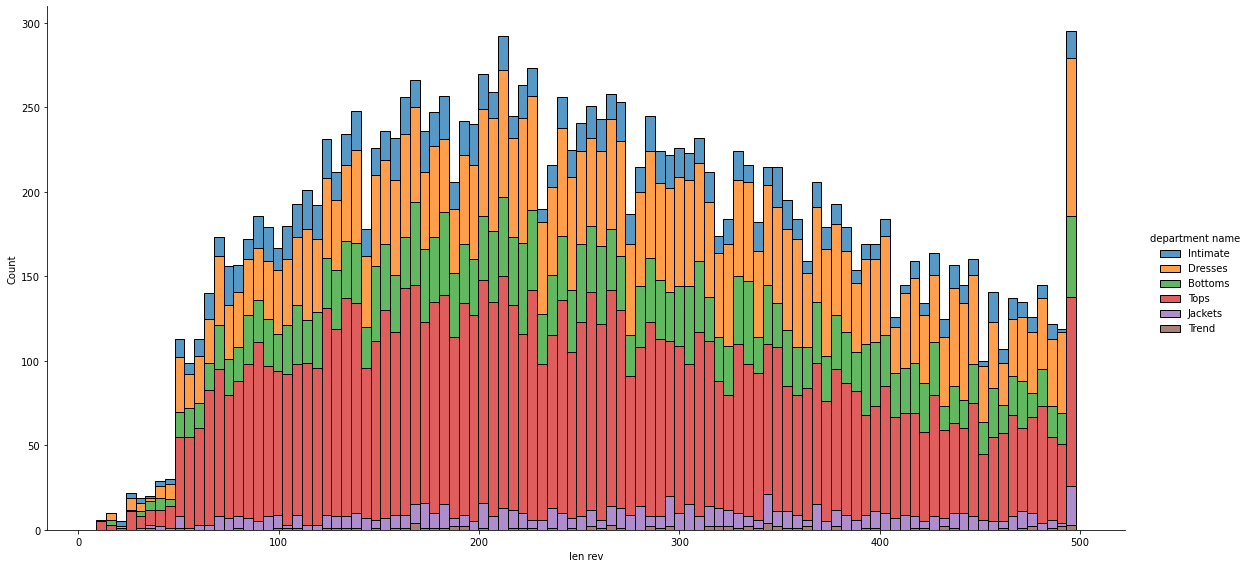

In [113]:
sns.displot(data=df[(df['len rev']<499) & (df['len rev']!=0)],
            x="len rev",
            hue="department name",
            multiple="stack",
            bins=100,
            height=8,
            aspect=2
           )

8. use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)

In [114]:
df.head()

,title,review text,rating,division name,department name,len rev
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192


In [115]:
df_by_div_dep = df.groupby(['division name', 'department name']).agg({'rating':'mean'}).reset_index()

In [116]:
df_by_div_dep["div dep"] = df_by_div_dep['division name'] + " " + df_by_div_dep['department name']

In [117]:
df_by_div_dep["div dep"]

0             General Bottoms
1             General Dresses
2             General Jackets
3                General Tops
4               General Trend
5      General Petite Bottoms
6      General Petite Dresses
7     General Petite Intimate
8      General Petite Jackets
9         General Petite Tops
10       General Petite Trend
11         Initmates Intimate
Name: div dep, dtype: object

<AxesSubplot:ylabel='div dep'>

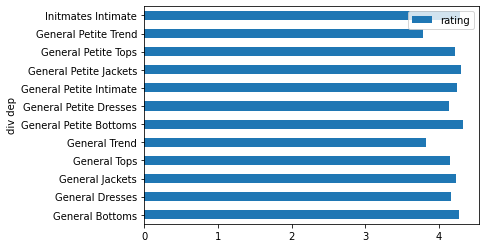

In [119]:
df_by_div_dep.plot(kind="barh", y='rating', x='div dep')

11. Sentiment

In [120]:
df.head(10)

,title,review text,rating,division name,department name,len rev
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,488
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,496
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops,482
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses,166
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses,360


In [121]:
text = df.iloc[5]['review text']

In [122]:
testimonial = TextBlob(text)

In [123]:
testimonial.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [124]:
testimonial.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [125]:
#deleting nulls in reviews
df['review text'].isna().sum()

845

In [126]:
#define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame.
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [127]:
df['polarity'] = df['review text'].apply(get_polarity)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [ ]:
# using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe. this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0


In [128]:
df_min_pol = df.groupby(['division name', 'department name']).agg({'polarity':'min'}).reset_index()

SpecificationError: Column(s) ['polarity'] do not exist

In [130]:
df_min_pol['div dep'] = df_min_pol['division name'] + " " + df_min_pol['department name']
df_min_pol

NameError: name 'df_min_pol' is not defined

In [131]:
df_min_pol = df_min_pol.sort_values(by='polarity')
df_min_pol.plot(kind="barh", y='polarity', x='div_dep')

NameError: name 'df_min_pol' is not defined

In [132]:
#17 using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe
df_mean_pol = df.groupby(['division name', 'department name']).agg({'polarity':'mean'}).reset_index()

SpecificationError: Column(s) ['polarity'] do not exist

In [133]:
df_mean_pol = df_mean_pol.sort_values(by='polarity')
df_mean_pol['div dep'] = df_mean_pol['division name'] + " " + df_mean_pol['department name']
df_mean_pol.plot(kind='barh', y='polarity', x='div_dep')

NameError: name 'df_mean_pol' is not defined